In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [27]:
# Step 1: Generate the "moons" dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Rescale the features to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-0.9, 0.9))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
import numpy as np

from squlearn import Executor
from squlearn.qelm.qelm_classification import QELMClassifier

from squlearn.encoding_circuit import ChebyshevPQC

In [29]:
pqc = ChebyshevPQC(8,2)

exec = Executor()

qelm  = QELMClassifier(pqc,executor=exec)

In [30]:
qelm.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = qelm.predict(X_test)

c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


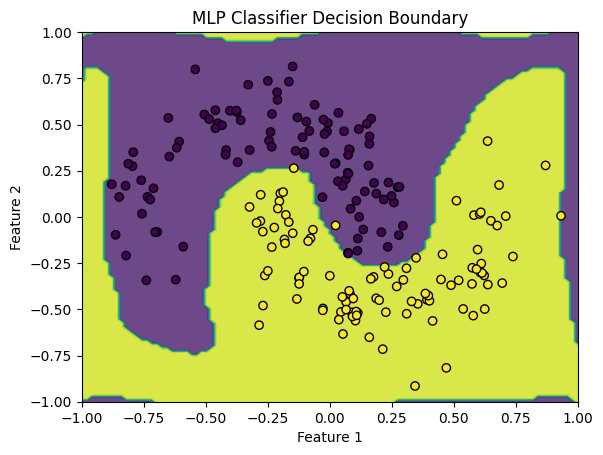

In [31]:

# Step 7: Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z = qelm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('MLP Classifier Decision Boundary')
plt.show()